#                     LINEAR REGRESSION

This is a cars dataset having 156 observation and 16 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.

### Import the dataset

In [1]:
import pandas as pd

car = pd.read_csv("C:\\Users\\Neha\\Desktop\\DataSet\\Car_Data.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.777639


### Check the shape of the dataset

In [2]:
car.shape

(156, 16)

### Check the information of the dataset

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        156 non-null    object 
 1   Model               156 non-null    object 
 2   Sales_in_thousands  151 non-null    float64
 3   _year_resale_value  156 non-null    float64
 4   Vehicle_type        156 non-null    object 
 5   Price_in_thousands  156 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    int64  
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Curb_weight         156 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     156 non-null    int64  
 14  Latest_Launch       156 non-null    object 
 15  Power_perf_factor   156 non-null    float64
dtypes: float

### Check the descriptive stats of the dataset

In [4]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Code to understand the total count and percentage of missing values.

In [4]:
 car.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    5
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [5]:
total = car.isnull().sum().sort_values(ascending=False)
percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
miss = print(missing_data)

                    Total   Percent
Sales_in_thousands      5  0.032051
Power_perf_factor       0  0.000000
Latest_Launch           0  0.000000
Fuel_efficiency         0  0.000000
Fuel_capacity           0  0.000000
Curb_weight             0  0.000000
Length                  0  0.000000
Width                   0  0.000000
Wheelbase               0  0.000000
Horsepower              0  0.000000
Engine_size             0  0.000000
Price_in_thousands      0  0.000000
Vehicle_type            0  0.000000
_year_resale_value      0  0.000000
Model                   0  0.000000
Manufacturer            0  0.000000


### Impute the missing value using "median" groupby Manufacturer.


In [6]:
car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
print (car.isnull().sum())

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


### Create a dummy variable for "Vehicle_type" and drop the original variable.

In [8]:
car_dummy =pd.DataFrame()            # Creating an empty data frame

dummies = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)
car_dummy = dummies
print(car_dummy)


    Manufacturer    Model  Sales_in_thousands  _year_resale_value  \
0          Acura  Integra              16.919           16.360000   
1          Acura       TL              39.384           19.875000   
2          Acura       CL              14.114           18.225000   
3          Acura       RL               8.588           29.725000   
4           Audi       A4              20.397           22.255000   
..           ...      ...                 ...                 ...   
151        Volvo      V40               3.545           18.072975   
152        Volvo      S70              15.245           18.072975   
153        Volvo      V70              17.531           18.072975   
154        Volvo      C70               3.493           18.072975   
155        Volvo      S80              18.969           18.072975   

     Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0                 21.50          1.8         140      101.2   67.3   172.4   
1              

### Dropping variables which will not help in prediction of sales.

('Manufacturer', 'Model', 'Latest_Launch')

In [9]:

car_drop = car_dummy.drop(car_dummy[['Manufacturer', 'Model', 'Latest_Launch']], axis=1)

print (car_drop)

     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
0                16.919           16.360000               21.50          1.8   
1                39.384           19.875000               28.40          3.2   
2                14.114           18.225000               29.00          3.2   
3                 8.588           29.725000               42.00          3.5   
4                20.397           22.255000               23.99          1.8   
..                  ...                 ...                 ...          ...   
151               3.545           18.072975               24.40          1.9   
152              15.245           18.072975               27.50          2.4   
153              17.531           18.072975               28.80          2.4   
154               3.493           18.072975               45.50          2.3   
155              18.969           18.072975               36.00          2.9   

     Horsepower  Wheelbase  Width  Leng

### Check for outliers using Box Plot

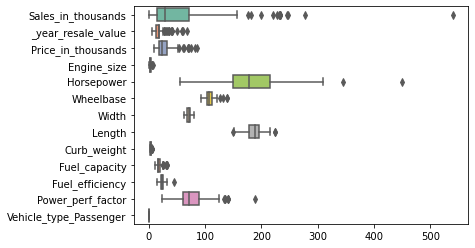

In [10]:
import seaborn as sns
sns.boxplot(data=car_drop, orient="h", palette="Set2")

### Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.¶

In [11]:
import pandas as pd

Q1 = car_drop.quantile(0.05)
Q3 = car_drop.quantile(0.95)
Q_diff = Q3 - Q1

print("Inter quantile range is:\n", Q_diff)

car_out = car_drop[~((car_drop < Q1)|(car_drop > Q3)).any(axis=1)]
print(car_drop[((car_drop < Q1)|(car_drop > Q3)).any(axis=1)])

car_dummy = car_out
print (car_dummy)

Inter quantile range is:
 Sales_in_thousands        231.362000
_year_resale_value         30.925000
Price_in_thousands         43.050000
Engine_size                 2.975000
Horsepower                185.500000
Wheelbase                  23.375000
Width                      11.700000
Length                     44.825000
Curb_weight                 1.965000
Fuel_capacity              12.900000
Fuel_efficiency            14.250000
Power_perf_factor          78.847931
Vehicle_type_Passenger      1.000000
dtype: float64
     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
6                1.3800           39.000000              62.000          4.2   
18              14.7850           18.072975              46.225          5.7   
24              17.9470           36.225000              45.705          5.7   
25              32.2990            9.125000              13.960          1.8   
26              21.8550            5.160000               9.235          1.0  

### Code to standardize the variable for model building (return value will be numpy.ndarray).

In [12]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(car_modify)
st = scaler.transform(car_modify)

std = st
print(std[1])

[ 0.5899825   0.35359816  0.35515073  1.01234914  0.17298443 -0.23940481
  0.48064716  0.38358335 -0.09656879  0.3796632   0.91744169  0.51298918]


### Code to create a DataFrame from  the standardized value calculated above

Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']


In [13]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']

cars= pd.DataFrame(std)
cars.columns = columns
cars.head()

,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,-0.094988,-0.519458,-1.569537,-1.161537,-1.485263,-1.410009,-1.798663,-1.856990,-2.191620,1.518653,-1.085259,0.512989
1,0.589983,0.353598,0.355151,1.012349,0.172984,-0.239405,0.480647,0.383583,-0.096569,0.379663,0.917442,0.512989
2,0.268446,0.429516,0.355151,1.012349,-0.115406,-0.122344,0.380580,0.263644,-0.096569,0.759326,0.855360,0.512989
3,2.509459,2.074404,0.767584,0.628722,1.735101,0.189817,0.892035,1.233368,0.322442,-0.759326,0.918592,0.512989
4,1.053775,-0.204398,-1.569537,-0.905786,-1.148807,-1.058828,-1.176022,-0.940856,-0.515579,1.138990,-0.813063,0.512989


### Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']

In [14]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                

X = cars[feature_cols]

print(X)

    Price_in_thousands  Engine_size  Wheelbase  Fuel_efficiency  \
0            -0.519458    -1.569537  -1.485263         1.518653   
1             0.353598     0.355151   0.172984         0.379663   
2             0.429516     0.355151  -0.115406         0.759326   
3             2.074404     0.767584   1.735101        -0.759326   
4            -0.204398    -1.569537  -1.148807         1.138990   
..                 ...          ...        ...              ...   
91           -0.152521    -1.432059  -1.653491         0.379663   
92            0.239721    -0.744671  -0.596058         0.379663   
93            0.404210    -0.744671  -0.596058         0.379663   
94            2.517258    -0.882149  -0.596058        -0.379663   
95            1.315225    -0.057282   0.605571         0.000000   

    Vehicle_type_Passenger  
0                 0.512989  
1                 0.512989  
2                 0.512989  
3                 0.512989  
4                 0.512989  
..                   

### Check for the type and shape of X.


In [15]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(96, 5)


### Extract y (dependent variable) for model building.

['Sales_in_thousands']

In [16]:
y = pd.DataFrame()
y = car_dummy['Sales_in_thousands']
print(y.head())

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64


### Check for the type and shape of y.

In [17]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(96,)


### Split the value of X and y into train and test datasets.

In [18]:
from  sklearn.model_selection import train_test_split
def lr():
    return train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = lr()


### Check the shape of X and y of train dataset.

In [19]:
print(X_train.shape)
print(y_train.shape)

(67, 5)
(67,)


### Check the shape of X and y of test dataset.

In [20]:
print(X_test.shape)
print(y_test.shape)

(29, 5)
(29,)


### Linear regression model using scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)  


LinearRegression()

### Interpret the Model Coefficients.

In [22]:
print('Intercept:',linreg.intercept_)                                            
print('Coefficients:',linreg.coef_)

Intercept: 43.87522524242046
Coefficients: [-27.00575624  12.90661213   4.27975072   1.8546483    0.78389836]


### Zip the features to pair the feature names with the coefficients.

In [23]:

feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
    print(c1,c2)

Intercept 43.87522524242046
Price_in_thousands -27.005756243837833
Engine_size 12.906612134218975
Wheelbase 4.279750718763276
Fuel_efficiency 1.8546482957829231
Vehicle_type_Passenger 0.7838983631239438


### Predict the train value using the built model.

In [24]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
   
pred.columns = ['Sales']
pred.head()


,Sales
0,60.119340
1,54.562361
2,39.003508
3,-6.887229
4,61.762201


### Predict the test value using the built model

In [25]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)

pred_test.columns=['Sales']
pred_test.head()


,Sales
0,-8.231543
1,59.464963
2,6.012677
3,14.710712
4,5.501903


### Evaluate the model using Mean Absolute Error metrics for both train and test.

In [26]:
from sklearn import metrics

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))


MAE for training set is 25.192898740260027
MAE for test set is 36.78483978918261


### Evaluate the model using Mean Squared Error for both train and test.

In [27]:

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))


MSE for training set is 1255.0790076887558
MSE for test set is 3153.9914202414557


### Evaluate the model using Root Mean Squared Error for both train and test.

In [28]:
import numpy as np

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 35.42709425974357
RMSE for test set is 56.160407942263525


### Evaluate the model using R-square value for both train and test.

In [29]:
from sklearn.metrics import r2_score

R2_train = r2_score(y_train, y_pred_train) 
R2_test = r2_score(y_test, y_pred_test) 
print('R2 for training set is {}'.format(R2_train))
print('R2 for test set is {}'.format(R2_test))


R2 for training set is 0.2885165699254393
R2 for test set is 0.16408126208636586
